In [1]:
# this may help creating new ideas to promote model
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [2]:
X_train_path = 'train/images'
y_train_path = 'train/masks'
depth_path = 'depths.csv'

In [3]:
# load data
with open(depth_path, 'r') as f:
    lines = f.readlines()
depth_data = {}
for line in lines[1:]:
    filename, depth = line[:-1].split(',')
    depth_data[filename] = int(depth)

In [4]:
X_train = []
y_train = []
depth_train = []
for filename in os.listdir(X_train_path):
    img = cv2.imread(os.path.join(X_train_path, filename), 0)
    img = cv2.resize(img, (128, 128))
    X_train.append(img)
    mask = cv2.imread(os.path.join(y_train_path, filename), 0)
    mask = cv2.resize(mask, (128, 128), interpolation=cv2.INTER_NEAREST)
    y_train.append(mask)
    depth = depth_data[filename[:-4]]
    depth_train.append(depth)

In [5]:
len(X_train)

4000

Text(0.5,0.98,'img')

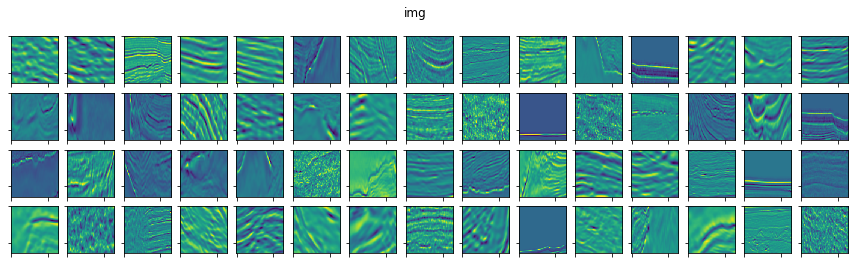

In [51]:
# show images
max_images = 60
grid_width = 15
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))
for i in range(max_images):
    img = X_train[i]
    ax = axs[i // grid_width, i % grid_width]
    ax.imshow(img)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.suptitle('img')

Text(0.5,0.98,'mask')

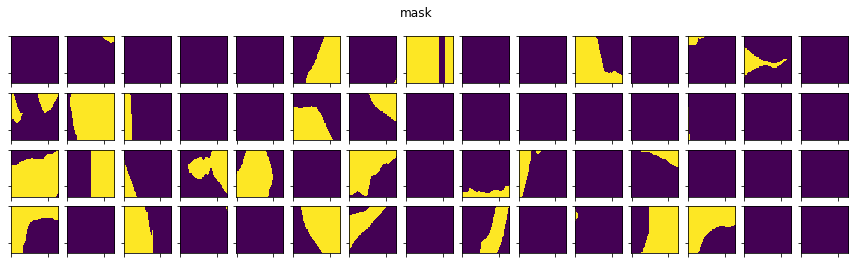

In [48]:
# show masks
max_images = 60
grid_width = 15
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))
for i in range(max_images):
    mask = y_train[i]
    ax = axs[i // grid_width, i % grid_width]
    ax.imshow(mask)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.suptitle('mask')

In [55]:
# calculate salt percents of each mask
salt_per = []
for mask in y_train:
    per = np.sum((mask/255)/(mask.shape[0]*mask.shape[1]))
    salt_per.append(per)

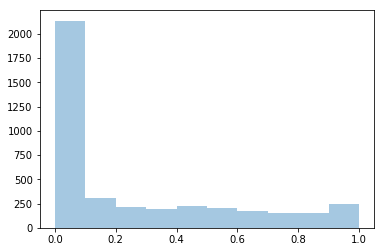

In [63]:
# show the distribution of salt percents
sns.distplot(salt_per, bins=10, kde=False) # it seems to have to do sample equalization

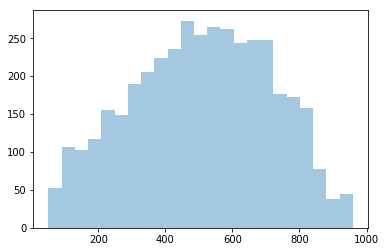

In [64]:
# show the distribution of depth
sns.distplot(depth_train, kde=False)

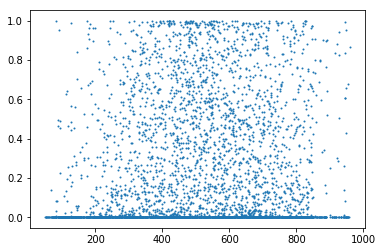

In [70]:
# show the relationship between depth and salt percentages
plt.scatter(depth_train, salt_per, s=1) # seems no regulations

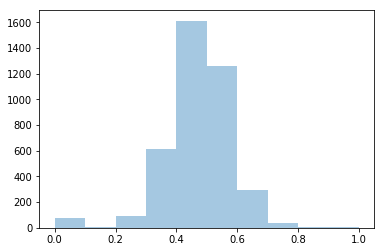

In [72]:
# show the distribution of color
color = []
for img in X_train:
    norm_color = np.sum((img/255)/(img.shape[0]*img.shape[1]))
    color.append(norm_color)
sns.distplot(color, bins=10, kde=False) # color distribution in train images seems to be centrally in the mid of 0 and 255

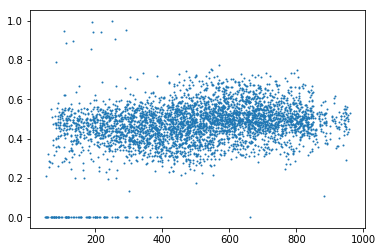

In [73]:
# show the relationship between depth and color
plt.scatter(depth_train, color, s=1) # color distributed at 0 and 0.8~1 tend to be from superficial images's

In [6]:
X_test_path = 'test/images'

In [7]:
# load test data
X_test = []
depth_test = []
for filename in os.listdir(X_test_path):
    img = cv2.imread(os.path.join(X_test_path, filename), 0)
    img = cv2.resize(img, (128, 128))
    X_test.append(img)
    depth = depth_data[filename[:-4]]
    depth_test.append(depth)

In [8]:
len(X_test)

18000

Text(0.5,0.98,'img')

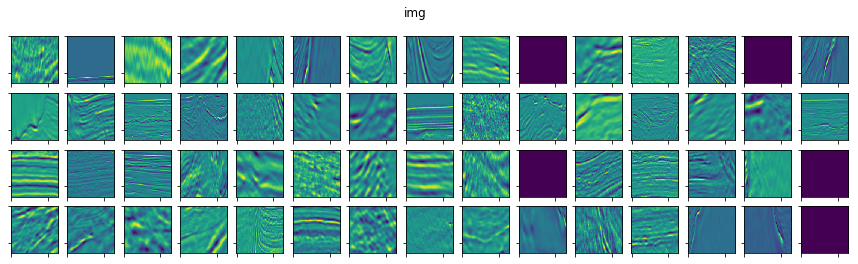

In [76]:
# show images
max_images = 60
grid_width = 15
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))
for i in range(max_images):
    img = X_test[i]
    ax = axs[i // grid_width, i % grid_width]
    ax.imshow(img)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.suptitle('img')

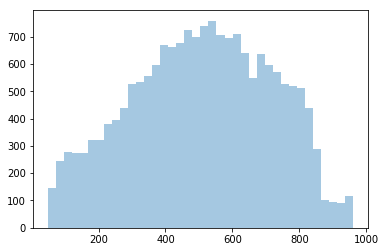

In [77]:
# show the distribution of depth
sns.distplot(depth_test, kde=False) # similar to train

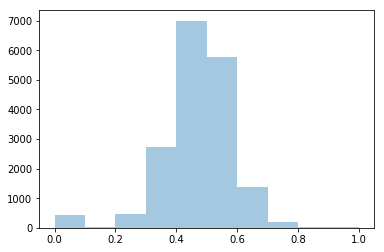

In [78]:
# show the distribution of color
color_t = []
for img in X_test:
    norm_color = np.sum((img/255)/(img.shape[0]*img.shape[1]))
    color_t.append(norm_color)
sns.distplot(color_t, bins=10, kde=False) # similar to train

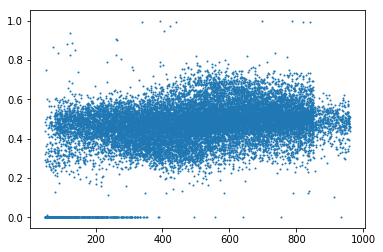

In [79]:
# show the relationship between depth and color
plt.scatter(depth_test, color_t, s=1) # similiar to train. aware the boundary between 800 and 900?